In [12]:
from src.data.pipelines import convnet_pipeline
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [66]:
## Parameters
# Pipeline
BATCH_SIZE_IMAGES = 1
BATCH_SIZE_PATCHES = 1
IMAGE_SIZE = 612
PATCH_SIZE = 40
PATCH_SIZE_ANNOTATION = 2
PATCH_STRIDE = 32
SLICE_TRAIN = ':100'
SLICE_VALID = '100:101'
SLICE_TEST = '101:102'

# Training
EPOCHS = 4
CHECKPOINT_FILEPATH = os.path.join(os.getcwd(), 'models', 'ckpt', 'early_convnet', 'weights.{epoch:02d}-{val_loss:.2f}.ckpt')
CLASS_WEIGHTS = {
        0: 6.070,    # urban_land
        1: 1.,       # agriculture_land
        2: 5.559,    # rangeland
        3: 4.128,    # forest_land
        4: 15.176,   # water
        5: 9.244,    # barren_land
        6: 100.       # unknown - Note: not to scale with respect to the others but not that important for the overall classification
}

In [67]:
input_pipeline = convnet_pipeline.ConvnetPipeline(
    SLICE_TRAIN,
    SLICE_VALID,
    SLICE_TEST,
    BATCH_SIZE_IMAGES,
    BATCH_SIZE_PATCHES,
    IMAGE_SIZE,
    PATCH_SIZE,
    PATCH_SIZE_ANNOTATION,
    PATCH_STRIDE
)

In [6]:
def display(display_list):
    plt.figure(figsize=(3, 3))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    print(len(display_list))
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [43]:
for i, m in input_pipeline.train.unbatch().take(1):
    print(tf.reduce_all(tf.argmax(m, axis=2)!=1))

tf.Tensor(False, shape=(), dtype=bool)


In [72]:
minority_classes = input_pipeline.train.unbatch().filter(lambda i, m: tf.reduce_all(tf.argmax(m, axis=2)==6)).batch(BATCH_SIZE_PATCHES)

tf.Tensor([[[[0 0 0 0 0 0 1]]]], shape=(1, 1, 1, 7), dtype=int32)
1


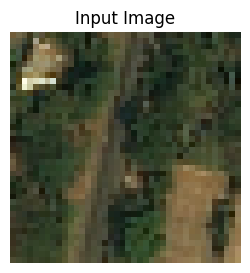

tf.Tensor([[[[0 0 0 0 0 0 1]]]], shape=(1, 1, 1, 7), dtype=int32)
1


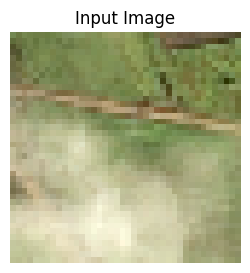

tf.Tensor([[[[0 0 0 0 0 0 1]]]], shape=(1, 1, 1, 7), dtype=int32)
1


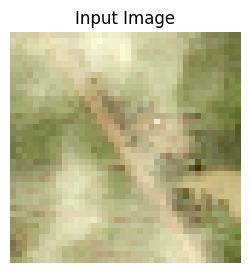

tf.Tensor([[[[0 0 0 0 0 0 1]]]], shape=(1, 1, 1, 7), dtype=int32)
1


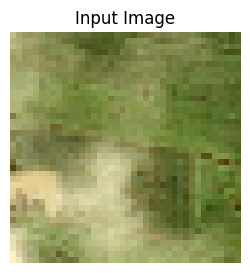

tf.Tensor([[[[0 0 0 0 0 0 1]]]], shape=(1, 1, 1, 7), dtype=int32)
1


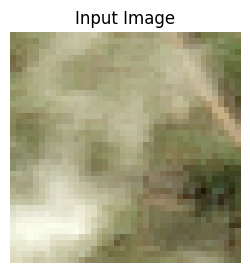

tf.Tensor([[[[0 0 0 0 0 0 1]]]], shape=(1, 1, 1, 7), dtype=int32)
1


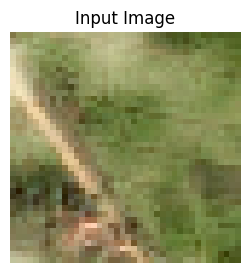

tf.Tensor([[[[0 0 0 0 0 0 1]]]], shape=(1, 1, 1, 7), dtype=int32)
1


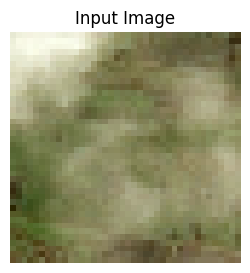

tf.Tensor([[[[0 0 0 0 0 0 1]]]], shape=(1, 1, 1, 7), dtype=int32)
1


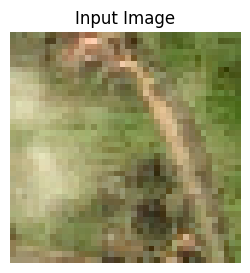

tf.Tensor([[[[0 0 0 0 0 0 1]]]], shape=(1, 1, 1, 7), dtype=int32)
1


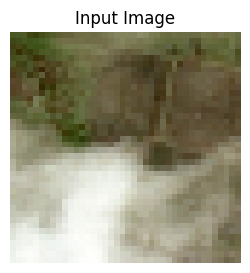

tf.Tensor([[[[0 0 0 0 0 0 1]]]], shape=(1, 1, 1, 7), dtype=int32)
1


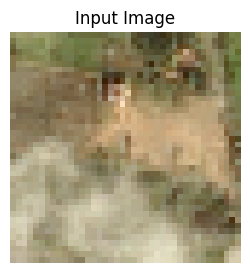

In [73]:
for i, m in minority_classes.take(10):
    print(m)
    display(i)